In [1]:
from importlib import reload
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import gan

cuda = torch.cuda.is_available()

print("Cuda: " + str(cuda))
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

Cuda: True
Cuda: True


Filename: generator_81_2_500


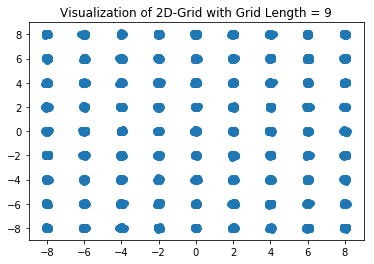

In [17]:
# experiment parameters
num_samples = 10000 # for plotting
num_epochs = 500
num_samples_per_batch = 500
grid_length = 9
var = 0.0025
latent_dim = 2
layer_width = 2

filename = "generator_%d_%d_%d" % (grid_length * grid_length, layer_width, num_epochs)
print("Filename: " + filename)

# here's what the 2D-Grid looks like
samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.title("Visualization of 2D-Grid with Grid Length = %d" % grid_length)
plt.scatter(*zip(*samples))

In [ ]:
# run this cell only if you want to train a different GAN
gen = gan.train(save_model=True, filename=filename,
                num_samples=num_samples, num_epochs=num_epochs, 
                num_samples_per_batch=num_samples_per_batch, 
                grid_length=grid_length, var=var, latent_dim=latent_dim,
                layer_width=layer_width)

plt.clf()

# underlay of true distribution
real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

# look at some samples
num_samples_to_test = 2000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = gen(z).cpu().detach().numpy()
plt.title("2D Grid of samples obtained")
plt.scatter(*(zip(*np_samples)))

print("Grid length = %d" % grid_length)

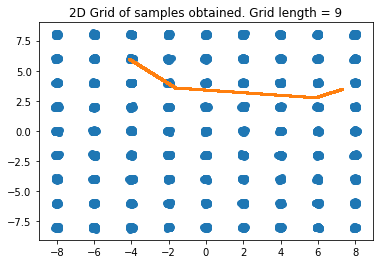

In [18]:
# load the model back and sample from it
# latent_dim = 2
# layer_width = 2
# loaded_gen = gan.load_model("good_generator_2018_07_11").eval()
# loaded_gen = gan.load_model("meh_generator_2018_07_11").eval()

loaded_gen = gan.load_model(filename, grid_length=grid_length, layer_width=layer_width).eval()

plt.clf()

real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

num_samples_to_test = 20000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = loaded_gen(z).cpu().detach().numpy()
plt.title("2D Grid of samples obtained. Grid length = %d" % grid_length)
plt.scatter(*zip(*np_samples), s=2.5)

In [ ]:
plt.clf()
gan.visualize_model(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)

In [ ]:
grid_length = 9

gan.visualize_latent_space(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)

In [ ]:
plt.clf()
s = gan.count_support_size(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)
print(s)

In [ ]:
num_trials = 1000
r = gan.gradient_free_avg_radius(loaded_gen, latent_dim=latent_dim, grid_length=grid_length, num_trials=num_trials)
print(r)

In [19]:
p = gan.frac_high_quality_samples(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)
print(p)

0.0484
